#1. Найти SVD разложение для матрицы

Сингулярное разложение матрицы $A_{m,n} = U \Sigma V^T$, где

* $U -$ унитарная матрица размера $m$, состоящая из левых сингулярных векторов,
* $V -$ унитарная размера n из правых сингулярных векторов,
* $Σ$ - диагональная матрица размера $m$ на $n$, на главной диагонали которой стоят сингулярные числа $A^TA$,

Для ее нахождения нужно найти сингулярные вектора и посчитать сингулярные числа соответвенных матриц.

In [ ]:
import numpy as np
import sympy as sp


A = np.matrix([[-22, -92, 42, 40],
              [-23, 68, -72, -52],
              [2, 58, 12, -32]])


U, S, Vt = np.linalg.svd(A)

U_sympy = sp.Matrix(U)

S_sympy = sp.zeros(U.shape[0], Vt.shape[0])
for i in range(len(S)):
    S_sympy[i, i] = S[i]

Vt_sympy = sp.Matrix(Vt)


print("Матрица U:")
display(U_sympy)
print("\nСобственные значения (диагональ S):")
display(S_sympy)
print("\nМатрица Vt (транспонированная V):")
display(Vt_sympy)
print("\nРезультат умножения:")
display(U_sympy @ S_sympy @ Vt_sympy)
print("\n")

Матрица U:


Matrix([
[ 0.666666666666667, -0.333333333333333, 0.666666666666667],
[-0.666666666666667, -0.666666666666667, 0.333333333333333],
[-0.333333333333333,  0.666666666666667, 0.666666666666667]])


Собственные значения (диагональ S):


Matrix([
[162.0,    0,    0, 0],
[    0, 54.0,    0, 0],
[    0,    0, 27.0, 0]])


Матрица Vt (транспонированная V):


Matrix([
[               0.0,    -0.777777777777778,    0.444444444444444,    0.444444444444444],
[ 0.444444444444445,     0.444444444444444,    0.777777777777777, 2.22044604925031e-16],
[-0.777777777777778, -1.11022302462516e-16,    0.444444444444444,   -0.444444444444445],
[-0.444444444444445,     0.444444444444444, 8.32667268468867e-17,    0.777777777777778]])


Результат умножения:


Matrix([
[           -22.0, -92.0,  42.0,  40.0],
[           -23.0,  68.0, -72.0, -52.0],
[2.00000000000001,  58.0,  12.0, -32.0]])

#2. Найти разложение полного ранга и псевдообратную матрицу для $A$

Чтобы найти скелетное разложение $A = BC$, сначала приведем матрицу к приведенному ступенчатому виду.

$A =$
$\begin{pmatrix}
4 & 13 & -7\\
-1 & -2 & 8\\
-2 & -5 & 11\\
-3 & 10 & -4\\
\end{pmatrix}
$
~
$
\begin{pmatrix}
1 & \frac{13}{4} & \frac{7}{4}\\
0 & 1 & 5\\
0 & 1 & 5\\
0 & 1 & 5\\
\end{pmatrix}$
~
$
\begin{pmatrix}
1 & 0 & -18\\
0 & 1 & 5\\
\end{pmatrix}$

После этого из столбцов приведенной матрицы составим $B$ и запишем $C$.

$B = \begin{pmatrix}
4 & 13\\
-1 & -2\\
-2 & -5\\
-3 & 10\\
\end{pmatrix}
, $
$C = \begin{pmatrix}
1 & 0 & -18\\
0 & 1 & 5\\
\end{pmatrix}$

In [ ]:
import numpy as np
from numpy.linalg import matrix_rank, pinv
import sympy as sp

A = np.matrix([
    [4, 13, -7],
    [-1, -2, 8],
    [-2, -5, 11],
    [3, 10, -4]
])

C = np.matrix([
    [1, 0, -18],
    [0, 1, 5],
])

B = A[:, [0, 1]]


B_sympy = sp.Matrix(B)
C_sympy = sp.Matrix(C)

print("\nМатрица B:")
display(B_sympy)
print("\nМатрица C:")
display(C_sympy)
print("\nПроверка A = B * C:")
display(B_sympy * C_sympy)
print("\n")


Матрица B:


Matrix([
[ 4, 13],
[-1, -2],
[-2, -5],
[ 3, 10]])


Матрица C:


Matrix([
[1, 0, -18],
[0, 1,   5]])


Проверка A = B * C:


Matrix([
[ 4, 13, -7],
[-1, -2,  8],
[-2, -5, 11],
[ 3, 10, -4]])

Псевдообратную матрицу можно найти таким способом по Муру-Пенроузу:

$$A^+ = C^+ B^+ = C^*(CC^*)^{-1} (B^*B)^{-1}B^*$$

In [ ]:
A_pseudo_inv = np.linalg.pinv(A)

C_plus = C.T @ np.linalg.inv(C @ C.T)
B_plus = np.linalg.inv(B.T @ B) @ B.T
A_plus = C_plus @ B_plus

A_sympy1 = sp.Matrix(A_plus)
A_sympy2 = sp.Matrix(A_pseudo_inv)

print("Обратная матрица")
display(A_sympy1)
print("Проверка:")
display(A_sympy2)
print("\n")

Обратная матрица


Matrix([
[0.0131868131868132, 0.00549450549450553, 0.00395604395604399, 0.0116483516483517],
[0.0508241758241759,  0.0315934065934067,  0.0277472527472528, 0.0469780219780222],
[0.0167582417582418,  0.0590659340659339,  0.0675274725274724, 0.0252197802197802]])

Проверка:


Matrix([
[0.0131868131868132, 0.0054945054945055, 0.00395604395604397, 0.0116483516483517],
[0.0508241758241759, 0.0315934065934066,  0.0277472527472528,  0.046978021978022],
[0.0167582417582418, 0.0590659340659341,  0.0675274725274726, 0.0252197802197803]])

#3. Среди всех приближений решения следующей системы по методу наименьших квадратов найти решение наименьшей длины

Решением наименьшей длины будет псевдорешение по Муру-Пенроузу.

Приведем $A$ к приведенному ступенчатому виду

$A =$
$\begin{pmatrix}
4 & 6 & 12 & 14\\
3 & 5 & 7 & 13\\
-2 & 0 &-15 & 11\\
-1 & 1 & -12 & 10\\
\end{pmatrix}
$
~
$
\begin{pmatrix}
1 & \frac{3}{2} & 3 & \frac{7}{2}\\
0 & 1 & -4 & 5\\
0 & 1 & -3 & 6\\
0 & 1 & \frac{18}{5} & \frac{27}{5}\\
\end{pmatrix}
$
~
$
\begin{pmatrix}
1 & \frac{3}{2} & 3 & \frac{7}{2}\\
0 & 1 & -4 & 5\\
0 & 0 & 1 & 1\\
0 & 0 & 1 & 1\\
\end{pmatrix}
$
~
$
\begin{pmatrix}
1 & 0 & 0 & -13\\
0 & 1 & 0 & 9\\
0 & 0 & 1 & 1\\
\end{pmatrix}
$

После этого из столбцов изначальной матрицы составим $F$ и запишем $G$.

$F =  \begin{pmatrix}
4 & 6 & 12\\
3 & 5 & 7\\
-2 & 0 &-15\\
-1 & 1 & -12\\
\end{pmatrix}
, $
$
G = \begin{pmatrix}
1 & 0 & 0 & -13\\
0 & 1 & 0 & 9\\
0 & 0 & 1 & 1\\
\end{pmatrix}
$

Аналогично предыдущему заданию найдем псведообратную матрицу.
Решением задачи будет $X = A^+ b$

In [ ]:
A = np.matrix([[4, 6, 12, 14],
              [3, 5, 7, 13],
              [-2, 0, -15, 11],
              [-1, 1, -12, 10]])

b = np.matrix([9, 5, 1, 9]).T

G = np.matrix([[1, 0, 0, -13],
               [0, 1, 0, 9],
               [0, 0, 1, 1]])

F = A[:, [0, 1, 2]]



G_plus = G.T @ np.linalg.inv(G @ G.T)
F_plus = np.linalg.inv(F.T @ F) @ F.T
A_psevd_inv = G_plus @ F_plus
answer = A_psevd_inv @ b

x, _, _, _ = np.linalg.lstsq(A, b, rcond=None)

print("Решение наименьшей длины:")
display(sp.Matrix(answer))
print("\nПроверка:")
display(sp.Matrix(x))
print("\n")

Решение наименьшей длины:


Matrix([
[ 4.49909297052132],
[ 6.52040816326499],
[-2.04058956916094],
[-1.84512471655319]])


Проверка:


Matrix([
[ 4.49909297052154],
[ 6.52040816326531],
[  -2.040589569161],
[-1.84512471655329]])

#4. Построить график и выписать интерполяционный многочлен Лагранжа для функции, проходящей через четыре точки, координаты которых образуют столбцы матрицы


Для построения многочлена Лагранжа воспользуемся формулой:

$P(x) = Σ_{i=0}^{n}y_il_i$ , где

$l_i = \dfrac{(x-x_0)(x-x_1)...(x-x_{n-1})(x-x_n)}{(x_i-x_0)(x_i-x_1)...(x_i-x_{n-1})(x_i-x_n)}$



Интерполяционный многочлен Лагранжа:


11*x**3/12 + 3*x**2/4 - 119*x/12 - 15/4

Интерполяционный многочлен Лагранжа c десятичными коэффицентами:


0.916666666666667*x**3 + 0.75*x**2 - 9.91666666666667*x - 3.75

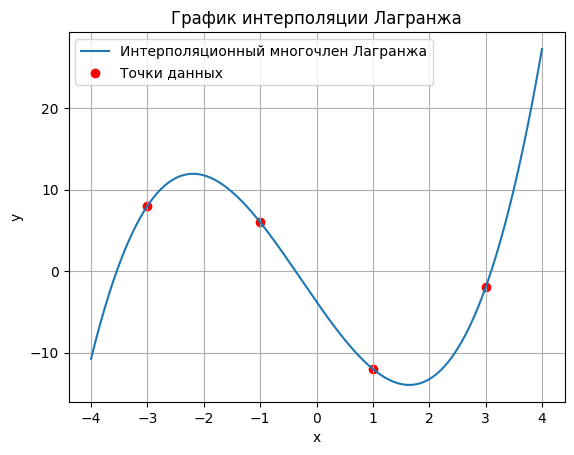

In [ ]:
import matplotlib.pyplot as plt

def get_li(i, points, x):
    xi, yi = points[i]
    l_i = 1
    for j, (xj, yj) in enumerate(points):
        if i != j:
            l_i *= (x - xj) / (xi - xj)
    return l_i

def lagrange(points, x):
    P = 0
    for i, (xi, yi) in enumerate(points):
        l_i = get_li(i, points, x)
        P += yi * l_i
    return P


points = [(-3, 8), (-1, 6), (1, -12), (3, -2)]

x_tmp = sp.symbols('x')
polynomial = lagrange(points, x_tmp).simplify()

print("Интерполяционный многочлен Лагранжа:")
display(polynomial)
print("Интерполяционный многочлен Лагранжа c десятичными коэффицентами:")
display(sp.N(polynomial))

# Строим график
lagrange_func = sp.lambdify(x_tmp, polynomial, 'numpy')
x_vals = np.linspace(-4, 4, 400)
y_vals = lagrange_func(x_vals)

plt.plot(x_vals, y_vals, label='Интерполяционный многочлен Лагранжа')
plt.scatter(*zip(*points), color='red', label='Точки данных')
plt.title("График интерполяции Лагранжа")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 5. Построить график и найти (параметрически) уравнение кривой Безье, заданной четырьмя точками, координаты которых образуют столбцы матрицы

Для нахождения параметрического уравнения кривой Безье 4-го порядка, заданной четырьмя точками, нужно использовать известную формулу для кривой Безье, которая строится на основе базисных полиномов Безье. Для 4 точек $P_0, P_1, P_2$ и $P_3$ это:

$$B(t) = (1 - t)^3P_0 + 3(1 - t)^2P_1 + 3(1 - t)^2P_2 + t^3P_3$$ , где $t$ принимает значения от 0 до 1.

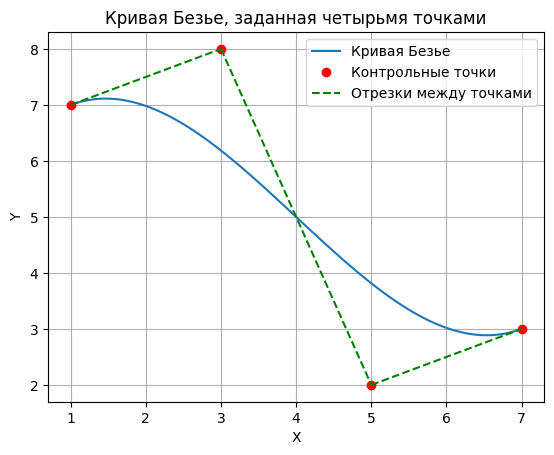

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Контрольные точки (P0, P1, P2, P3)
P = np.array([[1, 3, 5, 7],  # X-координаты
              [7, 8, 2, 3]]) # Y-координаты

# Параметр t от 0 до 1
t = np.linspace(0, 1, 100)

def get_point(my_P):
   B = (1 - t)**3 * my_P[0] + 3 * (1 - t)**2 * t * my_P[1] + 3 * (1 - t) * t**2 * my_P[2] + t**3 * my_P[3]
   return B

# Вычисление кривой Безье (B(t))
B_x = get_point(P[0])
B_y = get_point(P[1])

# Строим график
plt.plot(B_x, B_y, label="Кривая Безье")
plt.plot(P[0], P[1], 'ro', label="Контрольные точки")
plt.plot([P[0, 0], P[0, 1]], [P[1, 0], P[1, 1]], 'g--', label="Отрезки между точками")
plt.plot([P[0, 1], P[0, 2]], [P[1, 1], P[1, 2]], 'g--')
plt.plot([P[0, 2], P[0, 3]], [P[1, 2], P[1, 3]], 'g--')
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Кривая Безье, заданная четырьмя точками")
plt.grid(True)
plt.show()

#6. Для многочлена $-2x^3 + 3x^2 + 3x + 4$ найти наилучшее приближение по норме $\int_{-1}^{3} |f(x)| \, dx$ многочленом степени 2 на отрезке $[-1 ,3]$.

Найдем приближение через Чебышёвский альтернанс.

Чтобы многочлен $Q_n(x)$ был многочленом наилучшего равномерного приближения непрерывной функции $f(x)$, необходимо и достаточно существования на $[a,b]$ по крайней мере $n+2$ точек $x_0 < ... < x_{n+1}$ таких, что:

$$f(x_{i})-Q_{n}(x_{i})=\alpha (-1)^{i}||f-Q_{n}||$$

Для этого выберем $n + 2 = 4$ точек чебышёвского альтернанса. Чтобы условие выполнялось возьмем крайние точки, а также 2 экстремума функции (многочлен степени 3 может иметь не более 2 экстремумов).

$$(-2x^3 + 3x^2 + 3x + 4)' = 0$$
$$-6x^2 + 6x + 3 = 0$$
$$-6x^2 + 6x + 3 = 0$$
$$x = \frac{1}{2} \pm \frac{\sqrt{3}}{2}$$

Тогда решим систему, чтобы получить параметры $Q_n(x)$.
Пусть $Q_n(x) = at^2  + bt + c$. Тогда:

$$
\begin{cases}
f(-1) - c = \alpha L \\
f(3) - 9a - 3b - c = -\alpha L \\
f(\frac{1}{2} + \frac{\sqrt{3}}{2}) - a(\frac{1}{2} + \frac{\sqrt{3}}{2})^2 - b(\frac{1}{2} + \frac{\sqrt{3}}{2}) - c = \alpha L \\
f(\frac{1}{2} - \frac{\sqrt{3}}{2}) - a(\frac{1}{2} - \frac{\sqrt{3}}{2})^2 - b(\frac{1}{2} - \frac{\sqrt{3}}{2}) - c = -\alpha L \\
\end{cases}
$$

In [ ]:
x, a, b, c, L, t = sp.symbols('x a b c L t')

def f(x):
  return -2*x**3 + 3*x**2 + 3*x + 4

def Q(t):
  return a*t**2 + b*t + c

x1 = sp.Rational(1, 2) + sp.sqrt(3) / 2
x2 = sp.Rational(1, 2) - sp.sqrt(3) / 2

res = sp.solve([f(-1) - Q(-1) - L, f(3) - Q(3) + L, f(x1) - Q(x1) - L, f(x2) - Q(x2) + L], [a, b, c, L], dict=True)

print("Результаты:")
for solution in res:
    for var, value in solution.items():
        display(sp.Eq(var, value))

for solution in res:
    Q_poly = Q(x).subs(solution)
    Q_poly_simplified = sp.simplify(Q_poly)

print("Многочлен:")
display(sp.Eq(sp.Symbol("Q_n(x)"), Q_poly_simplified))
print("Многочлен с десятичными дробями:")
display(sp.Eq(sp.Symbol("Q_n(x)"),Q_poly_simplified.evalf()))
print("\n")

Результаты:


Eq(L, -42/13 + 48*sqrt(3)/13)

Eq(a, -29/13 - 4*sqrt(3)/13)

Eq(b, -28/13 + 32*sqrt(3)/13)

Eq(c, 121/13 - 12*sqrt(3)/13)

Многочлен:


Eq(Q_n(x), -x**2*(4*sqrt(3) + 29)/13 - 4*x*(7 - 8*sqrt(3))/13 - 12*sqrt(3)/13 + 121/13)

Многочлен с десятичными дробями:


Eq(Q_n(x), -2.76370794079042*x**2 + 2.10966352632339*x + 7.70887617762873)

Построим графики для сравнения

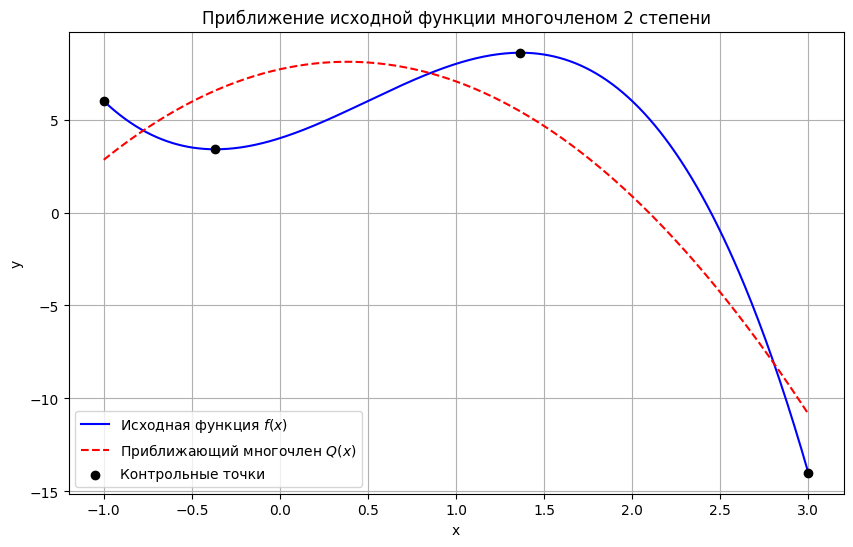

In [ ]:
solution = res[0]
Q_poly = Q(x).subs(solution)
Q_poly_simplified = sp.simplify(Q_poly)

f_np = sp.lambdify(x, f(x), 'numpy')
Q_np = sp.lambdify(x, Q_poly_simplified, 'numpy')

x_vals = np.linspace(-1, 3, 400)

f_vals = f_np(x_vals)
Q_vals = Q_np(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label='Исходная функция $f(x)$', color='blue')
plt.plot(x_vals, Q_vals, label='Приближающий многочлен $Q(x)$', color='red', linestyle='--')
plt.scatter([-1, 3, float(x1), float(x2)], [f(-1), f(3), f(x1), f(x2)], color='black', zorder=5, label="Контрольные точки")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Приближение исходной функции многочленом 2 степени")
plt.legend()
plt.grid(True)
plt.show()

#7. Построить многочлен степени ≤ 3, аппроксимирующий функцию $f(x) = \sqrt{3x + 8}$ на отрезке $[2, 6]$ по норме $|h|_Τ$.
$$|h|_Τ = \sqrt{\int_2^6\dfrac{h(x)^2}{\sqrt{1 - (2x-8)^2/16}}dx}$$

Рассмотрим пространство $H = C[2,6], f(x) \in H$

Тогда скалярное произведение будет задаваться как:
$(f(x), g(x))$ = $\int_2^6f(x)g(x)p(x)dx$

Где $p(x) = \dfrac{1}{\sqrt{1 - (2x-8)^2/16}}$

Из-за свойств комутативности скалярного произведения линейности интеграла и того, что скалярное произведение больше нуля получается что,
норма $f(x) = \sqrt{(f(x), f(x))}$


Для решения воспользуемся методом моментов $μ_n = \int_2^6x^np(x)dx$.

In [ ]:
from scipy.integrate import quad
x = sp.symbols('x')

def f(x):
    return (3 * x + 8)**(0.5)

def p(x):
    return 1 / (1 - (2 * x - 8)**2 / 16)**(0.5)


a, b = 2, 6

def compute_moment(i):
    return quad(lambda x: x**i * p(x), a, b)[0]

moments = np.array([compute_moment(i) for i in range(6)])

print(*moments)
print("\n")

6.283185307176895 25.132741228700567 113.09733552912046 552.9203070311361 2852.5661294554316 15230.441184578702




Найдем определители D1, D2, D3 и D4, чтобы найти систему ортогональных многочленов.

In [ ]:
D1 = sp.Matrix([1])

D2 = sp.Matrix([
    [moments[0], moments[1]],
    [1, x]
])

D3 = sp.Matrix([
    [moments[0], moments[1], moments[2]],
    [moments[1], moments[2], moments[3]],
    [1, x, x**2]
])

D4 = sp.Matrix([
    [moments[0], moments[1], moments[2], moments[3]],
    [moments[1], moments[2], moments[3], moments[4]],
    [moments[2], moments[3], moments[4], moments[5]],
    [1, x, x**2, x**3]
])

determinants = [
    D1.det().simplify().evalf(),
    D2.det().simplify().evalf(),
    D3.det().simplify().evalf(),
    D4.det().simplify().evalf()
]

for det in determinants:
  print("Многочлен с десятичными дробями:")
  display(det)
  print("----------------------------------------------------------------------------")

Многочлен с десятичными дробями:


1.00000000000000

----------------------------------------------------------------------------
Многочлен с десятичными дробями:


6.2831853071769*x - 25.1327412287006

----------------------------------------------------------------------------
Многочлен с десятичными дробями:


78.9568352085997*x**2 - 631.654681668865*x + 1105.39569292076

----------------------------------------------------------------------------
Многочлен с десятичными дробями:


992.200853746271*x**3 - 11906.410245137*x**2 + 44649.0384200586*x - 51594.444397442

----------------------------------------------------------------------------


Наилучшим приближением $f \in H$ относительно ортогональной системы многочленов является элемент $g$, такой что:

$$g = \sum_{i=0}^n \alpha_i D_i(x)$$
$$ ||f-g||^2 = \int_2^6 \rho (x)(f-g)^2 dx = min$$

Тогда было доказано, что:
$$\alpha_i = \frac{(f, D_i(x))}{(D_i(x), D_i(x))}$$


Построим графики для сравнения

In [ ]:
def integrand(expr):
    y = lambda x: eval(expr)
    return y

In [ ]:
p_fun = 1 / ((1 - (2 * x - 8) ** 2 / 16) ** 0.5)
f = (3 * x + 8) ** (0.5)
res = 0

for det in determinants:
    alpha = quad(integrand(repr(sp.simplify(p_fun * f * det))), 2, 6)[0] / quad(integrand(repr(sp.simplify(p_fun * det * det))), 2, 6)[0]
    res += alpha * det

display(sp.simplify(res).evalf(6))
print("\n")

0.000992525*x**3 - 0.0248585*x**2 + 0.486587*x + 2.86019

Построим графики

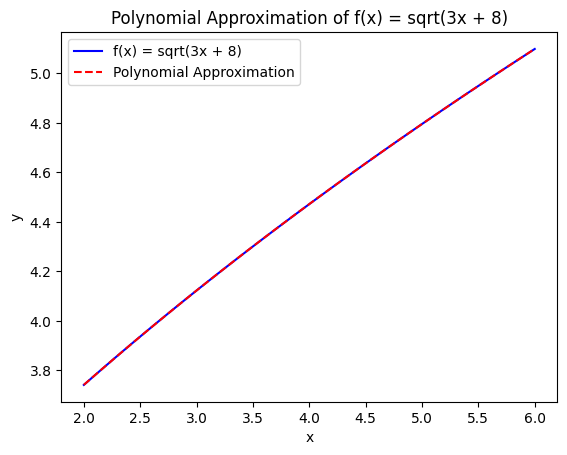

In [ ]:
def f(x):
    return np.sqrt(3 * x + 8)

def P(x, coeffs):
    return np.polyval(coeffs, x)

best_coeffs = [0.000992525, -0.0248585, 0.486587, 2.86019]

x_vals = np.linspace(2, 6, 100)

f_vals = f(x_vals)
P_vals = P(x_vals, best_coeffs)

plt.plot(x_vals, f_vals, label="f(x) = sqrt(3x + 8)", color="blue")
plt.plot(x_vals, P_vals, label="Polynomial Approximation", color="red", linestyle="--")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Polynomial Approximation of f(x) = sqrt(3x + 8)")

plt.show()

#8. При каком q уравнение $x^2(2q-4)+xy(4-4q)+y^2(8q+1)=1$ задает единичную окружность относительно какой-то нормы в двумерном пространстве? Найти норму вектора $(1, 1)$ в зависимости от $q$.

Чтобы найти параметр q и уравнение окружности, нужно взять матрицу
$M = \begin{pmatrix}
A & B\\
B & C\\
\end{pmatrix}$, где $A$, $B$ и $C$ это параметры уравнения окружности $Ax^2 + 2Bxy + Cy^2 = 1$

In [ ]:
x, y, q = sp.symbols('x y q')

M = sp.Matrix([
    [3*q - 4, 6 - 4*q],
    [6 - 4*q, 8*q + 1]
])

def compute_eigenvalues_and_eigenvectors(matrix):
    eigenvalues = matrix.eigenvals()
    eigenvectors = matrix.eigenvects()
    return eigenvalues, eigenvectors


eigenvalues_A, eigenvectors_A = compute_eigenvalues_and_eigenvectors(M)

eigenvalues_list = list(eigenvalues_A.keys())


print("Собственные числа:")
for val in eigenvalues_list:
    print(val)

q_solutions = sp.solve(sp.Eq(eigenvalues_list[0], eigenvalues_list[1]), q)

print("Решения для q")
print(q_solutions)
print("\n")

Собственные числа:
11*q/2 - sqrt(89*q**2 - 142*q + 169)/2 - 3/2
11*q/2 + sqrt(89*q**2 - 142*q + 169)/2 - 3/2
Решения для q
[71/89 - 100*I/89, 71/89 + 100*I/89]




$q = \frac{-7}{26} \pm \frac{11I}{13}$

Для вычисления нормы вектора $(1,1)$ относительно квадратичной формы, заданной матрицей M, нам нужно найти значение $||(1,1)|| = \sqrt{(x, y)M(x, y)^T} = \sqrt{Ax^2 + Bxy + C^2y^2}$, где $x = 1$ и $y = 1$.

In [ ]:

vector = sp.Matrix([1, 1])
norm_squared = (vector.T * M * vector)[0]
norm = sp.sqrt(norm_squared)

print("Норма вектора (1,1) относительно квадратичной формы:")
display(norm)

print("\nЗначение")
display(sp.Eq(sp.Symbol("q"), q_solutions[0]))
display(q_solutions[0])
print("\nНорма")
display(norm.subs(q, q_solutions[0]))

print("\nЗначение")
display(sp.Eq(sp.Symbol("q"), q_solutions[1]))
display(q_solutions[1])
print("\nНорма")
display(norm.subs(q, q_solutions[1]))
print("\n")

Норма вектора (1,1) относительно квадратичной формы:


sqrt(3*q + 9)


Значение


Eq(q, 71/89 - 100*I/89)

71/89 - 100*I/89


Норма


sqrt(1014/89 - 300*I/89)


Значение


Eq(q, 71/89 + 100*I/89)

71/89 + 100*I/89


Норма


sqrt(1014/89 + 300*I/89)

Норма: $\sqrt{-\frac{8}{13} \pm \frac{66i}{13}}$